In [2]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

current_dir = os.getcwd()
paths = [os.path.join(current_dir, 'Data Cleaning/extraction_DC'),
         os.path.join(current_dir, 'Data Fusion/extraction_DF'),
         os.path.join(current_dir, 'Retrieval Augmented Generation/extraction_RAG')]

topics = ['Data Cleaning', 'Data Fusion', 'Retrieval Augmented Generation']

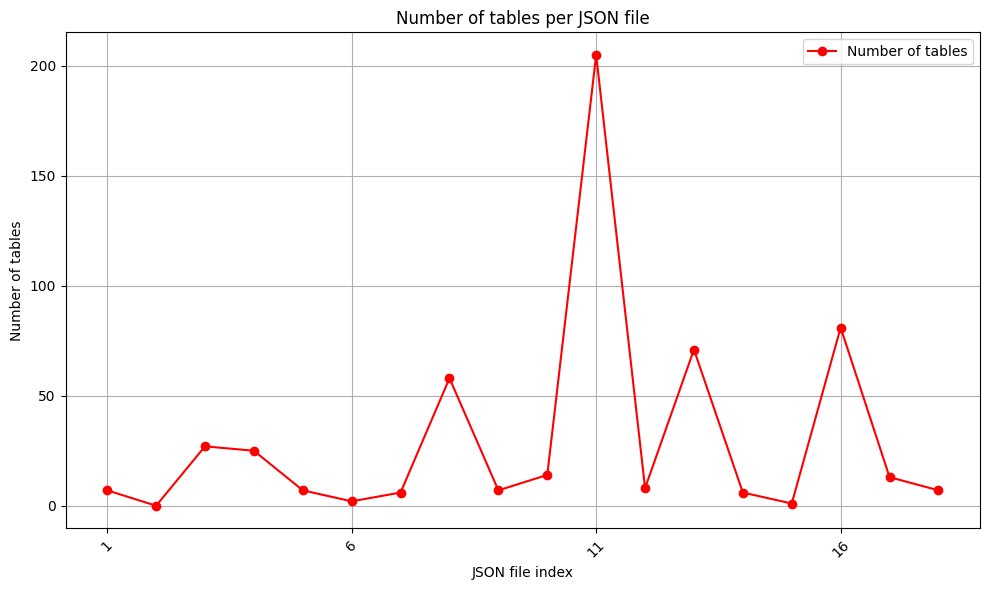

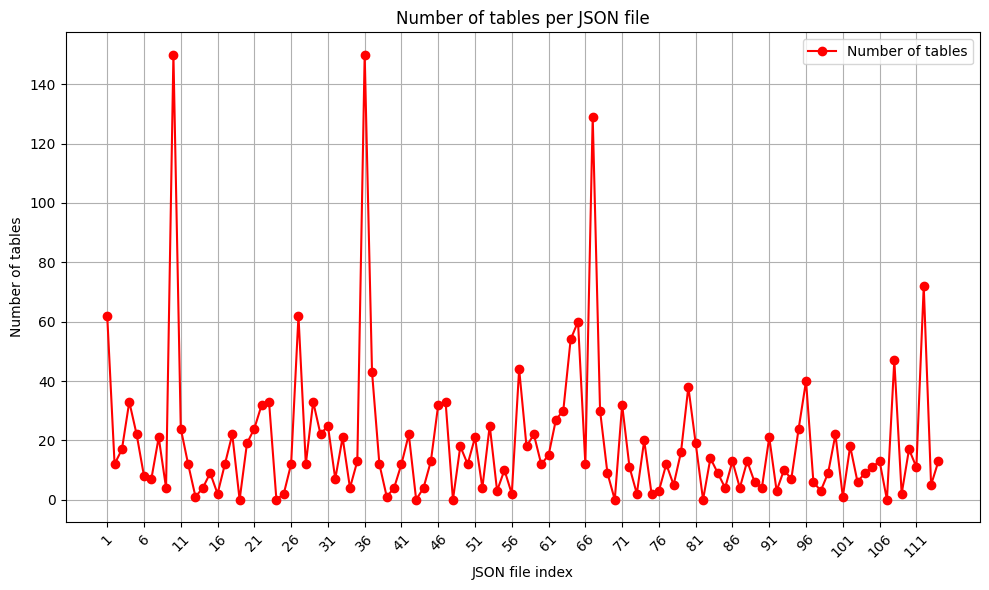

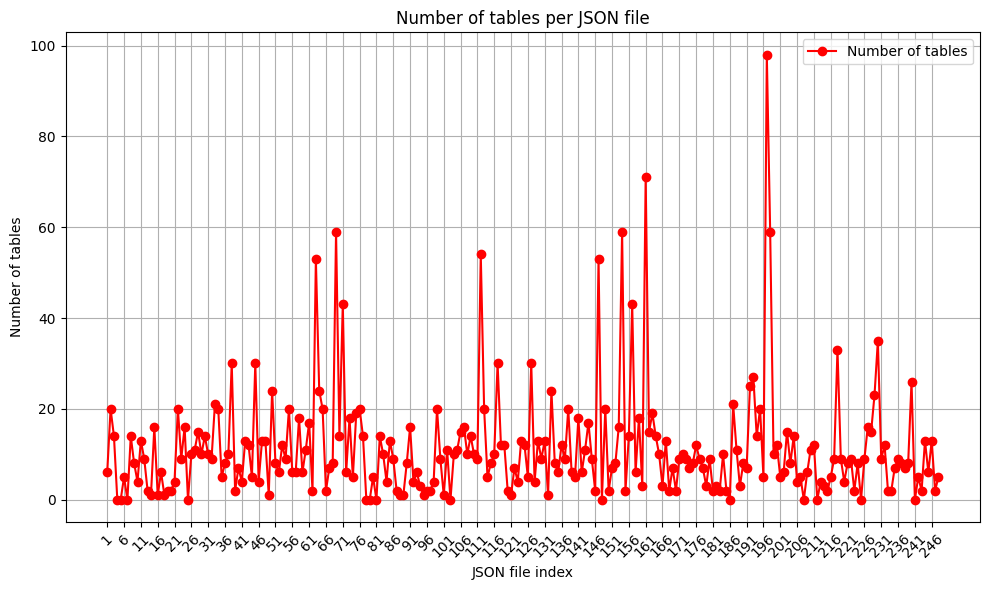

In [39]:

def show_distribution(directory_path, intervallo_tick):
    table_counts = []

    # Itera su tutti i file JSON nella cartella
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Conta le tabelle nel file
                num_tables = len(data)
                table_counts.append(num_tables)

    # Grafico con il numero di tabelle per JSON
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(table_counts) + 1), table_counts, marker='o', linestyle='-', color='red', label='Number of tables')
    plt.title('Number of tables per JSON file')
    plt.xlabel('JSON file index')
    plt.ylabel('Number of tables')
    plt.grid(True)

    # Imposta i tick solo ogni "intervallo_tick"
    plt.xticks(range(1, len(table_counts) + 1, intervallo_tick))

    # Ruota le etichette sull'asse X per migliorare la leggibilità
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.legend()
    plt.show()

    # Ritorna i dati per ulteriori analisi se necessario
    return table_counts

# Esempio di utilizzo


for path in paths:
    show_distribution(path, intervallo_tick=5)


In [19]:
def count_json_with_0_tables(directory_path):
    count = 0

    # Iterate over all JSON files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)

                # Check if the number of tables is zero
                if len(data) == 0:
                    count += 1

    return count


# Create a list to store the rows
rows = []

# Populate the list with the counts for each topic
for topic, path in zip(topics, paths):
    count = count_json_with_0_tables(path)
    rows.append([topic, count])

# Create the DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['Topic', 'Number of Empty JSON Files'])

# Display the DataFrame as a table with delimiters
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------------------------+------------------------------+
|    | Topic                          |   Number of Empty JSON Files |
+====+================================+==============================+
|  0 | Data Cleaning                  |                            1 |
+----+--------------------------------+------------------------------+
|  1 | Data Fusion                    |                            7 |
+----+--------------------------------+------------------------------+
|  2 | Retrieval Augmented Generation |                           14 |
+----+--------------------------------+------------------------------+


In [22]:
def average_tables_per_json(directory_path):
    total_tables = 0
    json_file_count = 0

    # Iterate over all JSON files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)
                total_tables += len(data)
                json_file_count += 1

    # Calculate the average number of tables per JSON file
    if json_file_count == 0:
        return 0
    return total_tables / json_file_count


# Create a list to store the rows
rows = []

# Populate the list with the counts for each topic
for topic, path in zip(topics, paths):
    count = average_tables_per_json(path)
    rows.append([topic, count])

# Create the DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['Topic', 'Average number of tables per JSON file'])

# Display the DataFrame as a table with delimiters
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------------------------+------------------------------------------+
|    | Topic                          |   Average number of tables per JSON file |
+====+================================+==========================================+
|  0 | Data Cleaning                  |                                  30.2778 |
+----+--------------------------------+------------------------------------------+
|  1 | Data Fusion                    |                                  19.5    |
+----+--------------------------------+------------------------------------------+
|  2 | Retrieval Augmented Generation |                                  11.3347 |
+----+--------------------------------+------------------------------------------+


In [24]:
def total_tables(directory_path):
    tot_tables = 0

    # Iterate over all JSON files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)
                tot_tables += len(data)

    return tot_tables

# Create a list to store the rows
rows = []

# Populate the list with the counts for each topic
for topic, path in zip(topics, paths):
    total_tables_count = total_tables(path)
    rows.append([topic, total_tables_count])

# Create the DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['Topic', 'Total number of tables'])

# Display the DataFrame as a table with delimiters
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+--------------------------------+--------------------------+
|    | Topic                          |   Total number of tables |
+====+================================+==========================+
|  0 | Data Cleaning                  |                      545 |
+----+--------------------------------+--------------------------+
|  1 | Data Fusion                    |                     2223 |
+----+--------------------------------+--------------------------+
|  2 | Retrieval Augmented Generation |                     2811 |
+----+--------------------------------+--------------------------+


In [37]:
def percentage_tables_with_references(directory_path):
    tot_tables = 0
    tables_with_references = 0

    # Iterate over all JSON files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)

                # Iterate through the nested structure
                for key, table in data.items():
                    if isinstance(table, dict):
                        tot_tables += 1
                        if 'references' in table and table['references']:
                            tables_with_references += 1

    # Calculate the percentage of tables with non-empty references
    if tot_tables == 0:
        return 0
    return (tables_with_references / tot_tables) * 100

# Create a list to store the rows
rows = []

# Populate the list with the counts for each topic
for topic, path in zip(topics, paths):
    percentage = percentage_tables_with_references(path)
    rows.append([topic, percentage])

# Create the DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['Topic', 'Percantage of tables with references'])

# Display the DataFrame as a table with delimiters
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------------------------+----------------------------------------+
|    | Topic                          |   Percantage of tables with references |
+====+================================+========================================+
|  0 | Data Cleaning                  |                                24.7706 |
+----+--------------------------------+----------------------------------------+
|  1 | Data Fusion                    |                                34.8178 |
+----+--------------------------------+----------------------------------------+
|  2 | Retrieval Augmented Generation |                                58.0576 |
+----+--------------------------------+----------------------------------------+


In [45]:
def count_tables_with_ltx_equation(directory_path):
    count = 0

    # Iterate over all JSON files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)
          
          
                for key, value in data.items():
                    if 'table' in value and value['table'].startswith('<table class="ltx_equation'):
                        count += 1
    return count

def count_tables_with_empty_caption(directory_path):
    count = 0

    # Iterate over all JSON files in the directory
    for file_name in sorted(os.listdir(directory_path)):
        if file_name.endswith('.json'):
            with open(os.path.join(directory_path, file_name), 'r', encoding='utf-8') as f:
                data = json.load(f)

                # Iterate through the nested structure
                for key, table in data.items():
                    if isinstance(table, dict) and 'caption' in table and table['caption'] == '':
                        count += 1

    return count

# Create a list to store the rows
rows = []

# Populate the list with the counts for each topic
for topic, path in zip(topics, paths):
    number_eq = count_tables_with_ltx_equation(path)
    number_empty_cap = count_tables_with_empty_caption(path)
    
    rows.append([topic, number_eq, number_empty_cap])

# Create the DataFrame from the list of rows
df = pd.DataFrame(rows, columns=['Topic', 'Total number of equations', 
                                 'Total numer of tables with empty caption'])

# Display the DataFrame as a table with delimiters
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+--------------------------------+-----------------------------+--------------------------------------------+
|    | Topic                          |   Total number of equations |   Total numer of tables with empty caption |
+====+================================+=============================+============================================+
|  0 | Data Cleaning                  |                         467 |                                        467 |
+----+--------------------------------+-----------------------------+--------------------------------------------+
|  1 | Data Fusion                    |                        1636 |                                       1654 |
+----+--------------------------------+-----------------------------+--------------------------------------------+
|  2 | Retrieval Augmented Generation |                        1091 |                                       1103 |
+----+--------------------------------+-----------------------------+-----------

In [3]:
def calcola_media_riferimenti_per_tabella(paths, topics):
    risultati = []

    # Itera su ciascun percorso e il rispettivo topic
    for path, topic in zip(paths, topics):
        total_references = 0
        total_tables = 0

        # Itera su tutti i file JSON nella cartella specificata
        for file_name in os.listdir(path):
            if file_name.endswith('.json'):
                with open(os.path.join(path, file_name), 'r', encoding='utf-8') as f:
                    try:
                        data = json.load(f)

                        # Itera su tutte le tabelle nel file JSON
                        for table_id, table_data in data.items():
                            # Conta i riferimenti per la tabella corrente
                            num_references = len(table_data.get("references", []))
                            total_references += num_references
                            total_tables += 1

                    except json.JSONDecodeError:
                        # Se il file JSON non è ben formattato, lo ignora
                        continue

        # Calcola la media dei riferimenti per tabella per il topic corrente
        if total_tables == 0:
            media_riferimenti = 0  # Evita divisione per zero nel caso non ci siano tabelle
        else:
            media_riferimenti = total_references / total_tables

        # Aggiungi i risultati alla lista
        risultati.append([topic, media_riferimenti])

    # Stampa i risultati in una tabella formattata
    headers = ["Topic", "Average Number of References per Table"]
    print(tabulate(risultati, headers=headers, tablefmt="grid"))


calcola_media_riferimenti_per_tabella(paths, topics)


+--------------------------------+------------------------------------------+
| Topic                          |   Average Number of References per Table |
+================================+==========================================+
| Data Cleaning                  |                                 0.462385 |
+--------------------------------+------------------------------------------+
| Data Fusion                    |                                 0.512821 |
+--------------------------------+------------------------------------------+
| Retrieval Augmented Generation |                                 0.875845 |
+--------------------------------+------------------------------------------+
